# Mappeoppgave 5

**I denne oppgaven så skal jeg ta for meg en regresjonsanalyse av inntekts ,- og skattetoppen i Stavanger kommune, og se om det er noen klar sammenheng mellom hvor høy inntekten er og hvor mye skatt det betales der etter. Hentet fra: https://e24.no/spesial/skattelister/2020/1103/**

## A)

**Denne oppgaven er gjort i et samarbeid med Mathias Hetland, Martin Smedstad og Adrian Risberg**
**Koden til oppgaven er inspirert av Espen Sirnes SOK-1005, kap.10 - Statsmodeles og 9-webskraping med python. hentet fra: https://github.com/espensirnes/notebooks** 

In [1]:

from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all("table")
    return tables

tables=fetch_html_tables("https://e24.no/spesial/skattelister/2020/1103/")
table_html=tables[0]

#printing top
print(str(table_html)[:1000])


<table class="table table-sm"><thead><tr><th class="w-5"></th><th class="w-30">Navn</th><th class="text-right clickable">Inntekt<i class="material-icons md-14 middle"></i></th><th class="text-right clickable">Formue</th><th class="text-right clickable">Skatt</th></tr></thead><tbody><tr><td>1<!-- -->.</td><td><div class="name">ODD<!-- --> <!-- -->TORLAND</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/1103/">Stavanger</a>, f.<!-- --> <!-- -->1964</div></td><td class="text-right">54 377 457</td><td class="text-right">92 827 913</td><td class="text-right">23 486 912</td></tr><tr><td>2<!-- -->.</td><td><div class="name">STEINAR<!-- --> <!-- -->VÅGE</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/1103/">Stavanger</a>, f.<!-- --> <!-- -->1964</div></td><td class="text-right">51 818 624</td><td class="text-right">86 911 293</td><td class="text-right">6 293 171</td></tr><tr><td>3<!-- -->.</td><td><div class="name">ESPEN<!

In [142]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all("tr"):
        r=[]
        #finding all cells in each row:
        cells=row.find_all("td")
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all("th")
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ""
    else:
        s=" ".join([str(c) for c in cell.content])
        
    #Cleaning the script:
    s=s.replace("\xa0","")
    s=s.replace("\n","")
    s=s.replace("Stavanger", "")
    s=s.replace("\ue5cf", "")
    s=s.replace("Navn", "")
   
    return s

table=html_to_table(table_html)


print(str(table)[:1000])

[['', '', 'Inntekt', 'Formue', 'Skatt'], ['1.', 'ODD TORLAND, f.1964', '54377457', '92827913', '23486912'], ['2.', 'STEINAR VÅGE, f.1964', '51818624', '86911293', '6293171'], ['3.', 'ESPEN FJOGSTAD, f.1963', '50017044', '52876713', '16349593'], ['4.', 'OLE ERTVAAG, f.1963', '40734868', '250322420', '16388986'], ['5.', 'ERLING UELAND, f.1963', '32079779', '91729602', '16020523'], ['6.', 'TORE CHRISTIANSEN, f.1962', '29418089', '31641913', '13824105'], ['7.', 'DAG SIGVART KAADA, f.1973', '26580661', '56302911', '11760242'], ['8.', 'EGIL MESSMER, f.1975', '25530659', '110321798', '9212441'], ['9.', 'BJØRN MAASEIDE, f.1968', '24804456', '275086832', '10530777'], ['10.', 'RONNY GRANLI, f.1972', '24361006', '16076038', '7978172'], ['11.', 'KJELL SKAPPEL, f.1977', '23809216', '0', '8784657'], ['12.', 'TORSTEIN EREVIK, f.1949', '23787748', '119997626', '8565038'], ['13.', 'NORALV GEIR BØE, f.1958', '23618210', '9548418', '10887528'], ['14.', 'JARLE MADSEN, f.1958', '23160316', '7089003', '1011

In [4]:
f=open('skattstavanger.csv','w')
";".join(table[0])

';;Inntekt;Formue;Skatt'

In [5]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('skattstavanger.csv',table)

In [6]:
import pandas as pd
pd.read_csv('skattstavanger.csv', delimiter=';', encoding='UTF-8')


,Unnamed: 0,Unnamed: 1,Inntekt,Formue,Skatt
0,1.0,"ODD TORLAND, f.1964",54377457,92827913,23486912
1,2.0,"STEINAR VÅGE, f.1964",51818624,86911293,6293171
2,3.0,"ESPEN FJOGSTAD, f.1963",50017044,52876713,16349593
3,4.0,"OLE ERTVAAG, f.1963",40734868,250322420,16388986
4,5.0,"ERLING UELAND, f.1963",32079779,91729602,16020523
5,6.0,"TORE CHRISTIANSEN, f.1962",29418089,31641913,13824105
6,7.0,"DAG SIGVART KAADA, f.1973",26580661,56302911,11760242
7,8.0,"EGIL MESSMER, f.1975",25530659,110321798,9212441
8,9.0,"BJØRN MAASEIDE, f.1968",24804456,275086832,10530777
9,10.0,"RONNY GRANLI, f.1972",24361006,16076038,7978172


In [109]:
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv('skattstavanger.csv', delimiter=';', encoding='UTF-8')

Text(1.0, 1.0, 'Inntekt og skatt i Stavanger')

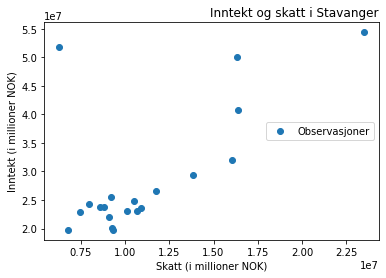

In [154]:
fig,ax=plt.subplots()

ax.scatter(data["Skatt"], data["Inntekt"], label = "Observasjoner")
ax.set_ylabel("Inntekt (i millioner NOK)")
ax.set_xlabel('Skatt (i millioner NOK)')
ax.legend(loc='right',frameon=True)
plt.title(label="Inntekt og skatt i Stavanger", loc="right")



**I dette plottet kan man se forholdet mellom inntekt (Y), skatt (X), med en betydlig spredning.**

In [134]:
y=data['Inntekt']
pd.DataFrame(y)

,Inntekt
0,54377457
1,51818624
2,50017044
3,40734868
4,32079779
5,29418089
6,26580661
7,25530659
8,24804456
9,24361006


In [135]:
x=pd.DataFrame(data['Skatt'])
x['intercept']=1

x

,Skatt,intercept
0,23486912,1
1,6293171,1
2,16349593,1
3,16388986,1
4,16020523,1
5,13824105,1
6,11760242,1
7,9212441,1
8,10530777,1
9,7978172,1


In [136]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Inntekt   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     12.39
Date:                Tue, 29 Mar 2022   Prob (F-statistic):            0.00245
Time:                        12:52:27   Log-Likelihood:                -346.88
No. Observations:                  20   AIC:                             697.8
Df Residuals:                      18   BIC:                             699.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Skatt          1.6758      0.476      3.520      0.0

**Det viktigste i resultatet som er presentert er nødvendigvis kofissienten, som angis mellom 0 og 1 som et tall som et mål på forskjell på gruppen valgt ut. I dette tilfelle er p-verdien  0.408, noe som er mindre enn én prosent, og kan derfor konkludere med at resultatet er signifikant. grunnen for selve regjresjon analysen er for å undersøke om det er en linær sammenheng mellom inntekt og skatt, og i dette tilfelle med untak av et par avvik så er den linære sammenhengen signifikant.**

**COEF tallene viser at kryssningspunktet til y-aksen er 1.043, og at skatt vil øke med 1.6754**

**Tallene fra COEF blir brukt til å lage en regresjonslinje i plottet:**

In [141]:
res.params

Skatt        1.675803e+00
intercept    1.043045e+07
dtype: float64

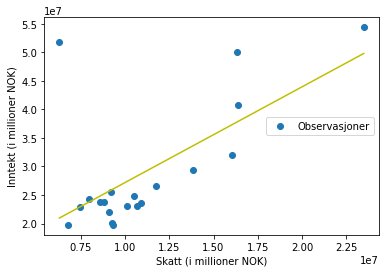

In [140]:
x=np.linspace(min(data['Skatt']), max(data['Skatt']), 100)

regression_line=res.params['intercept']+res.params['Skatt']*x

ax.plot(x, regression_line , color='y')

fig

**Her kan man se at regresjonslinjen passer godt til dataene, siden vi har brukt OLS vet man at dette er den linjen som gir minst avstand i gjennomsnitt til punktene.**